In [4]:
import numpy as np
import matplotlib.pyplot as plt
import json
import networkx as nx

In [5]:
players = {}
ids = {}
teams = {}
with open("data/players.json") as f:
    data = json.load(f)

for row in data:
    if (row['lastName'] == ""):
        name = row["firstName"]
    else:
        name = row['lastName']+", "+row["firstName"]
    iden = str(row['playerId'])
    players[name] = iden
    ids[iden] = name
    teams[iden] = row['teamId']

In [6]:
team_id = 1610612760

In [26]:
def assist_ratios_team(team_id):
    for name in players:
        iden = players[name]

        if (teams[iden] != team_id):
            continue
        fname = "data/"+players[name]+"-passing.json"

        with open(fname, "r") as f:
            data = json.load(f)
        hist = []
        for key in data:
            if (teams[key] != team_id):
                continue
            if(data[key][0] != 0 and data[key][1] != 0):
                hist.append(data[key][1]/data[key][0])
        print(hist)
        plt.title(name)
        plt.hist(hist)
        plt.show()
    return None

def assist_ratios_player(player_id):
    G = nx.DiGraph()
    labels = {}
    widths = []
    
    iden = player_id
    name = ids[iden]
    labels[iden] = name
    print(name)

    fname = "data/"+players[name]+"-passing.json"

    with open(fname, "r") as f:
        data = json.load(f)
    
    for key in data:
        if(data[key][0] != 0 and data[key][1] != 0):
            widths.append(5*data[key][1]/data[key][0])
            G.add_edge(iden, key, weight=data[key][1]/data[key][0])
            labels[key] = ids[key]
        
    pos = nx.spring_layout(G)
    plt.figure(figsize=(8,8))
    plt.title(name)
    nx.draw_networkx_edges(G, pos, width=widths)
    nx.draw_networkx_nodes(G, pos, node_size=50)
    nx.draw_networkx_labels(G,pos,labels, font_size=6)
    return None

In [27]:
#assist_ratios_team(team_id)

Rubio, Ricky


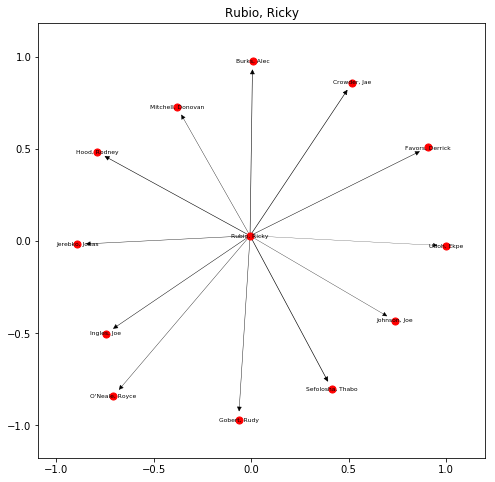

In [28]:
assist_ratios_player("201937")

Rondo, Rajon


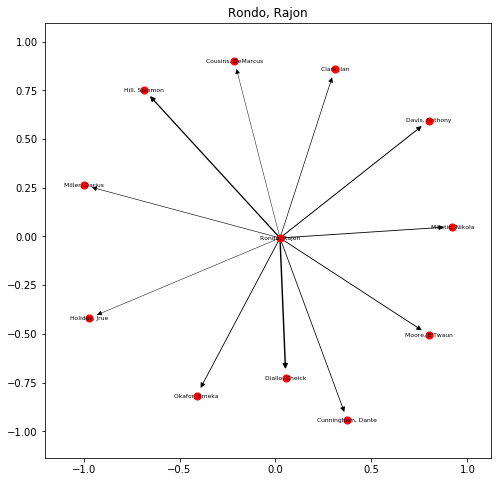

In [29]:
assist_ratios_player("200765")

Korver, Kyle


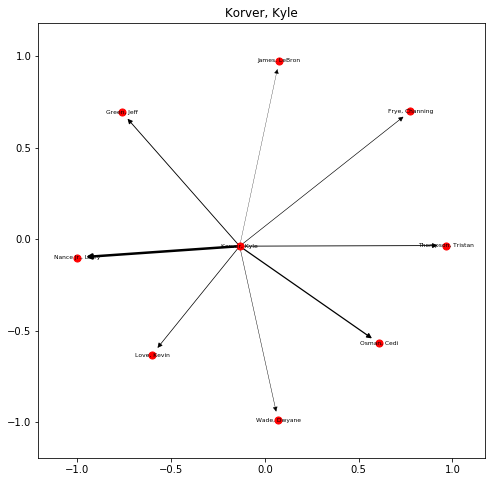

In [30]:
assist_ratios_player("2594")

Redick, JJ


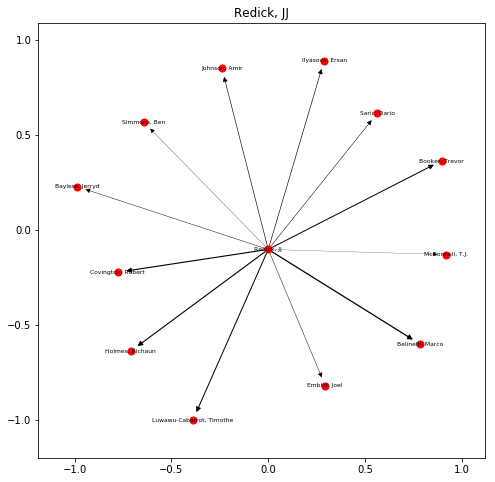

In [31]:
assist_ratios_player("200755")